<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/Titanic%20ARBOLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISIS EDA
Conjunto de estadisticas coyo obj es explorar describir y resumir la neturaleza
pasos
1. realizar un analisis descriptivo de las variables
2. re ajustar los tipos de variables
3. detectar y tratar datos ausentes NaN
4. Identificar datos atipicos y tratarlos de forma adecuada
5. Realizar un examen numerico y grafico con el fin de encontrar grado de correlación

In [91]:
#tratamiento de deatos
import pandas as pd
import numpy as np
#gRAFICOS
import matplotlib.pyplot as plt
import seaborn as sns
#modelado
from sklearn.model_selection import train_test_split #Partir el dataset
from sklearn.tree import DecisionTreeRegressor #modelos
from sklearn.metrics import accuracy_score#dibujar arbol
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


In [92]:
df=pd.read_csv('/content/titanic-train.csv')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S


2. Exploración de datos:
* Survived:0= murio, 1= sobrevivio
* Pclass:Clase del tiquete. 1=1st, 2=2nd, 3=4RD
* sisbsp:
* parch:# de padres/hijos
* cabin:No. de la cabina
* embarked: puerto de embarque C=Chebourg, Q=Queenstown, S=Southhampton

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [97]:
porcentaje=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentaje

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [98]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Dead']
  test.plot(kind="bar",stacked=True,figsize=(10,5))


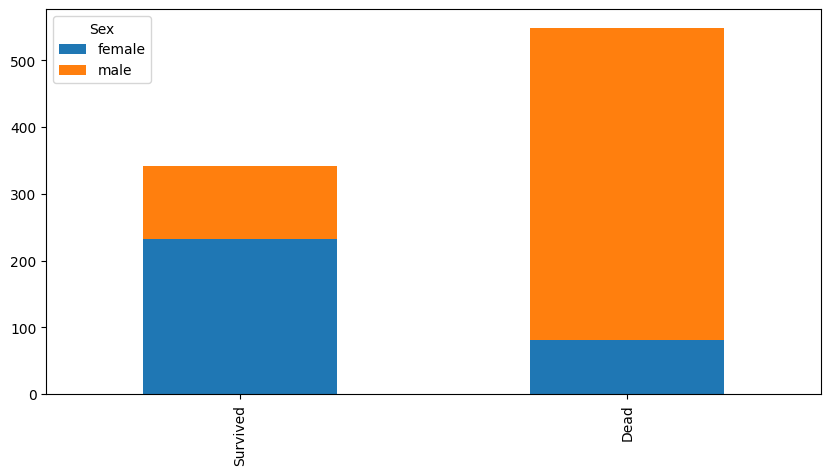

In [100]:
bar_char("Sex")

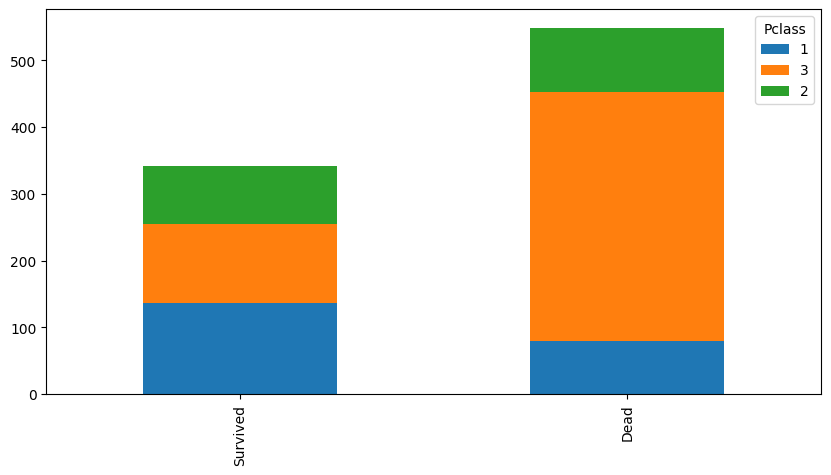

In [101]:
bar_char("Pclass")

La grafica señala que la clase alta tuvo mayor probabilidad de supervivencia con respecto a **otras clases**
La grafica señala que la clase 3 **fallecio mas**
en comparacion a otras clases*****

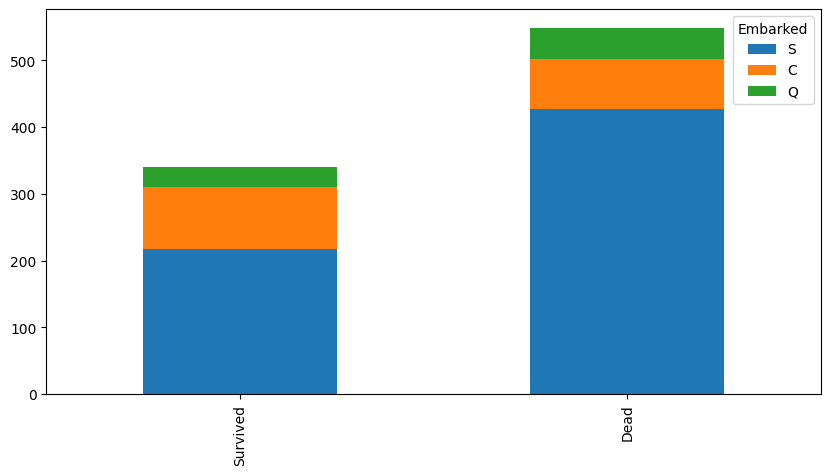

In [102]:
bar_char("Embarked")

La grafica confirma que
* una persona que aborda desde c tuvo una ligera probabiidad de sobrevivir
* si una persona que aborda Q o S probablemente murió


##Ingenieria de caracteristicas
es el proceso de usar el dominio del conocimiento
para crear nuevas caracteristicas ( feature vector)
y que logre que los algoritmos de machine learning funcionen correctamente
feature vector es un vector n-dimensional que representa un objeto.Muchos algorimos de ML requieren una representacion numerica de los objetos, ya que facilitan el procesamiento y el analisis estadistico

In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df=pd.read_csv('/content/titanic-train.csv')

In [105]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


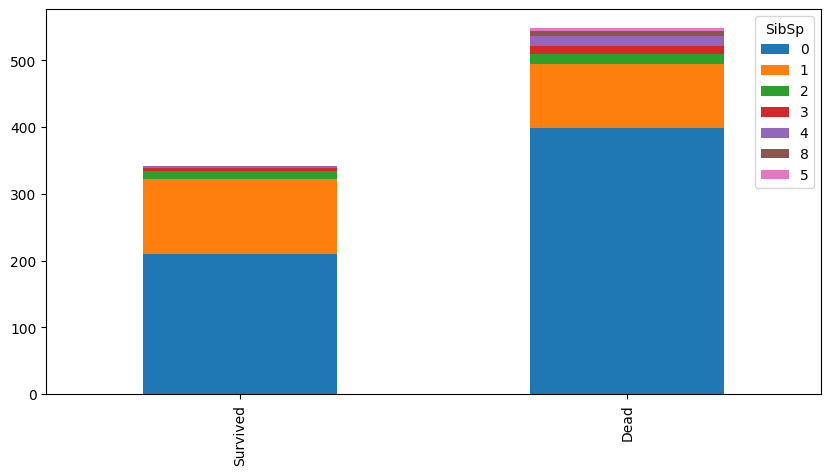

In [106]:
bar_char('SibSp')

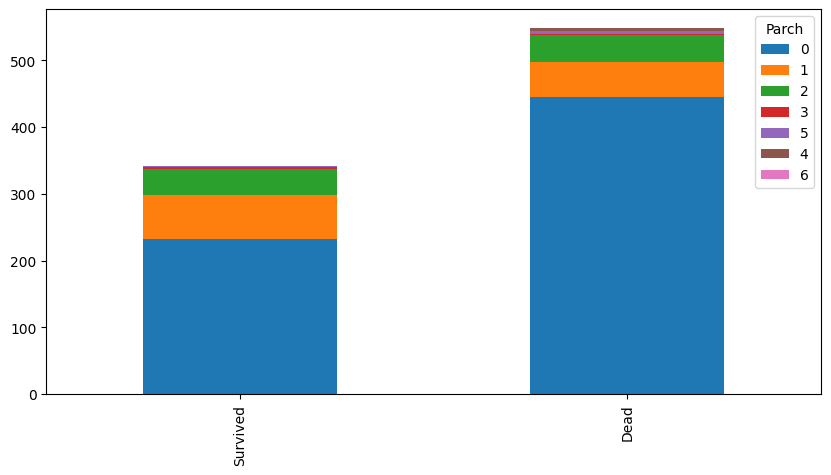

In [107]:
bar_char('Parch')

2.Creando nuevos vectore features:

In [108]:
def extrar_Titulo(data):
  titles = data["Name"].str.extract("([A-Za-z]+)\.",expand = True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1185305723.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles = data["Name"].str.extract("([A-Za-z]+)\.",expand = True)


In [109]:
df["Title"]=extrar_Titulo(df)
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


Crear Mapa Titulo

In [110]:
def replace_titles(data):
  title_mapping={"Mr":"señor","Miss":"señora","Mrs":"señorita"}
  data["Title"]=data["Title"].map(title_mapping).fillna("Otros")
  return data

In [111]:
df=replace_titles(df)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C,señora
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S,señorita
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S,señor
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,señor
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,señor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Otros
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S,señorita
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,señor
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S,señor
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S,señor


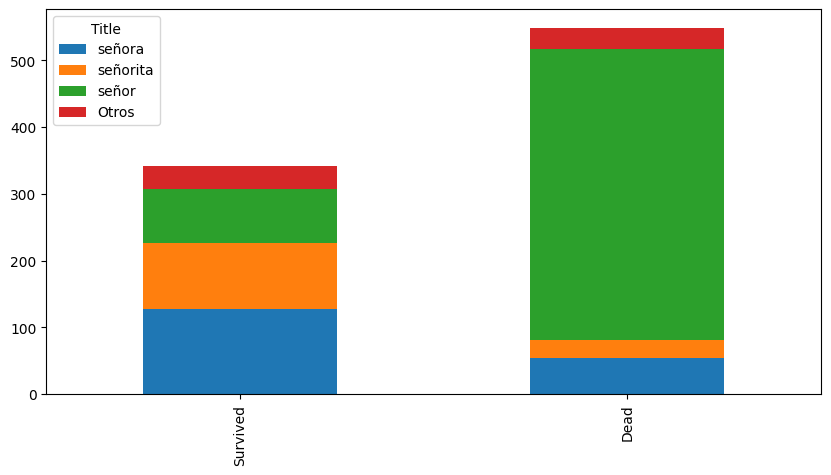

In [112]:

bar_char('Title')

In [113]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [114]:

df.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,señor
1,2,1,1,female,38.0,1,0,71.2833,C,señorita
2,3,1,3,female,26.0,0,0,7.9250,S,señora
3,4,1,1,female,35.0,1,0,53.1000,S,señorita
4,5,0,3,male,35.0,0,0,8.0500,S,señor


In [115]:

title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Otros,20.430161
señor,32.368090
señora,21.773973
señorita,35.898148


In [116]:

df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

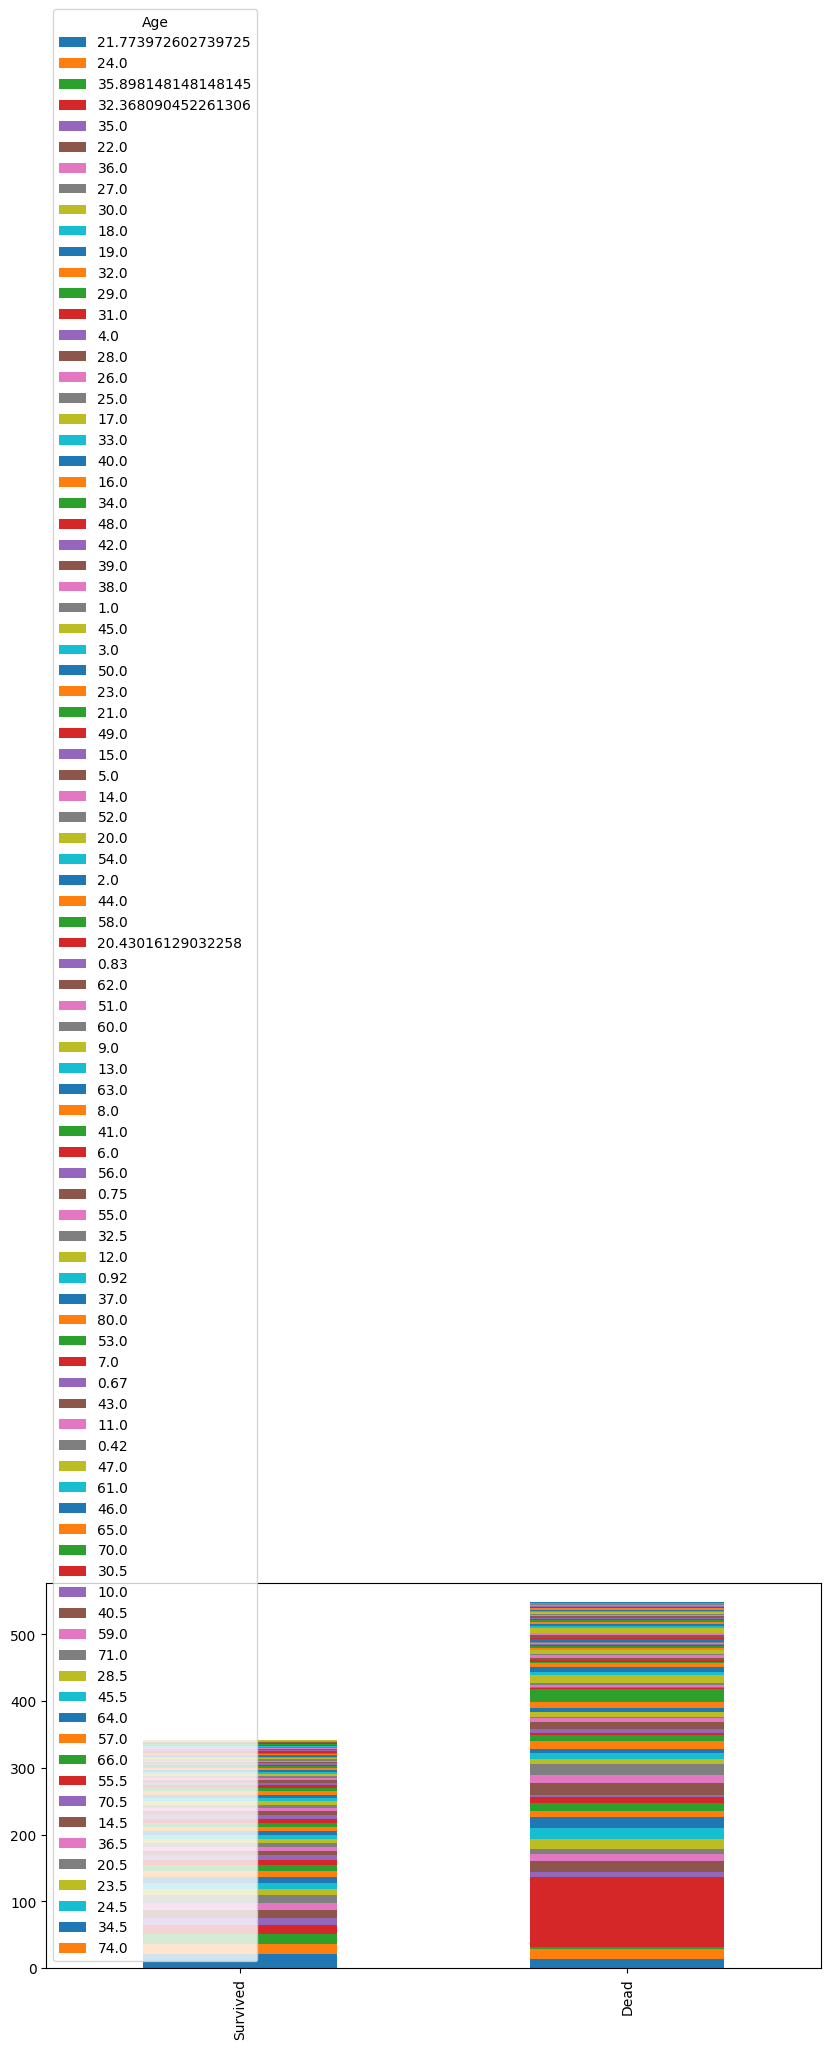

In [117]:
bar_char("Age")

Actividad
**texto en negrita**


encontrar una estrategia que me clasifique en varios grupos las personas que subieron al titanic (Niños,Adolecentes,jovenadulto, adulto,adulto mayo) rango de edades:Niños(0-12),adolecentes(13-19),joven adulto(20-35),36-60),adulto mayor(>60)

In [118]:
def classify_age_group(age):
    if age <= 12:
        return 'Niño'
    elif 13 <= age <= 19:
        return 'Adolescente'
    elif 20 <= age <= 30:
        return 'Joven adulto'
    elif 31<= age <= 60:
        return 'Adulto'
    else:
        return 'Adulto mayor'

df['Age_Group'] = df['Age'].apply(classify_age_group)
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Group
0,1,0,3,male,22.0,1,0,7.2500,S,señor,Joven adulto
1,2,1,1,female,38.0,1,0,71.2833,C,señorita,Adulto
2,3,1,3,female,26.0,0,0,7.9250,S,señora,Joven adulto
3,4,1,1,female,35.0,1,0,53.1000,S,señorita,Adulto
4,5,0,3,male,35.0,0,0,8.0500,S,señor,Adulto


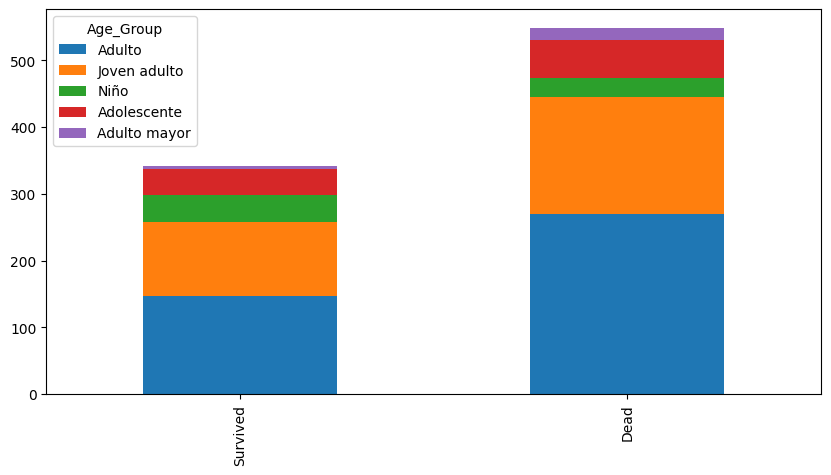

In [119]:
bar_char('Age_Group')

se puede notar la distribución de sobrevivientes y muertos entre distintos grupos de edad. El grupo de 'Joven adulto' es el que tiene el mayor número tanto de sobrevivientes como de muertos. El grupo de 'Niño' parece tener una supervivencia considerablemente alta en comparando con otros grupos. El grupo de 'Adulto mayor' es el que menos personas tiene por ende un numero menor de sobrevivientes.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


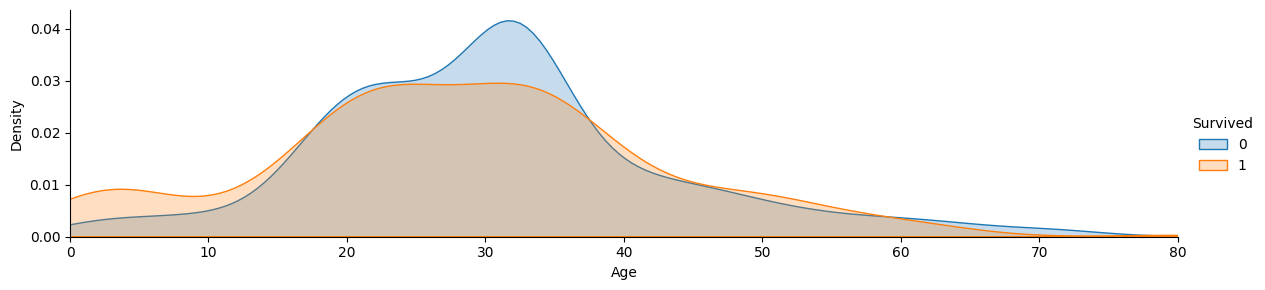

In [120]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

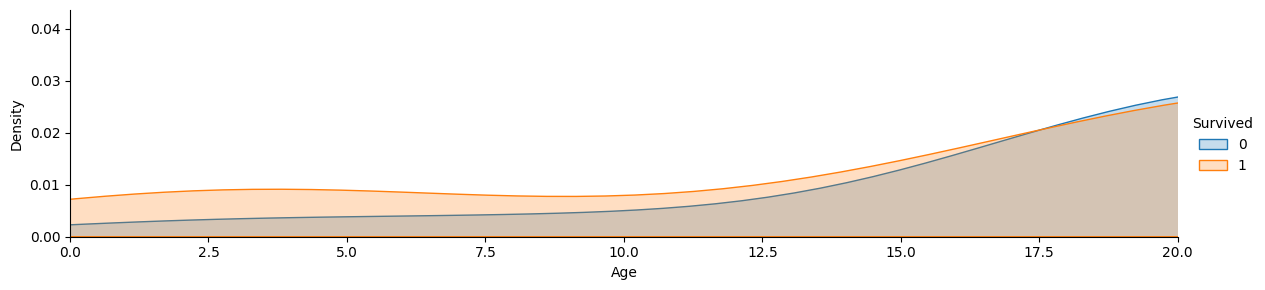

In [121]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 40.0)

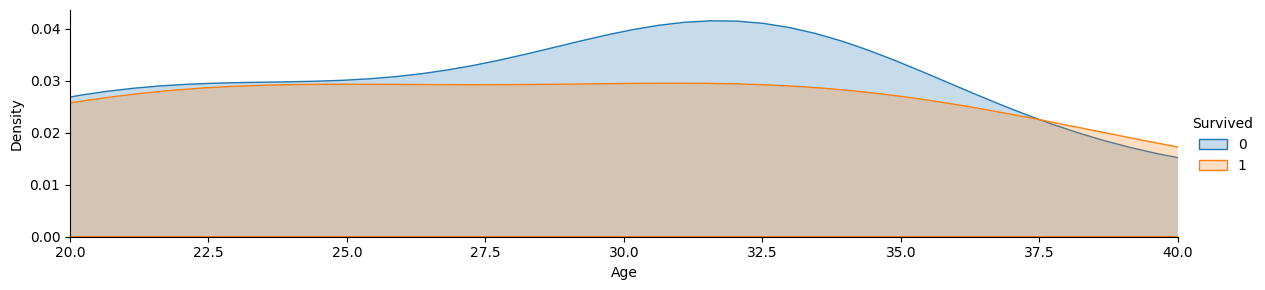

In [122]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(40.0, 60.0)

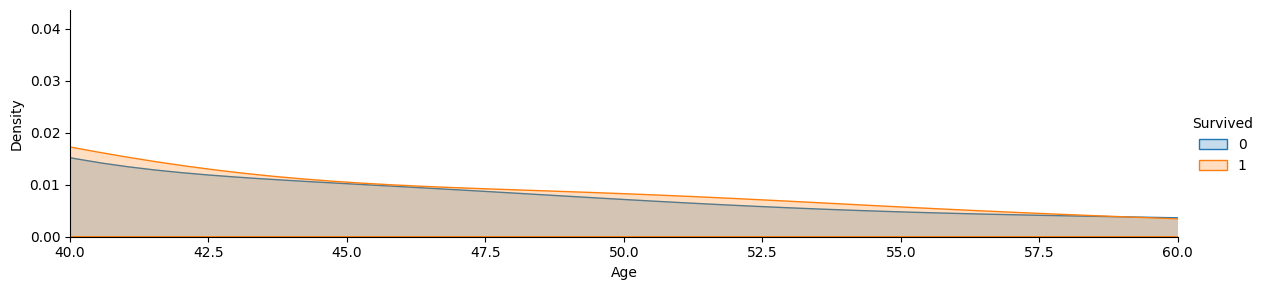

In [123]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(60.0, 80.0)

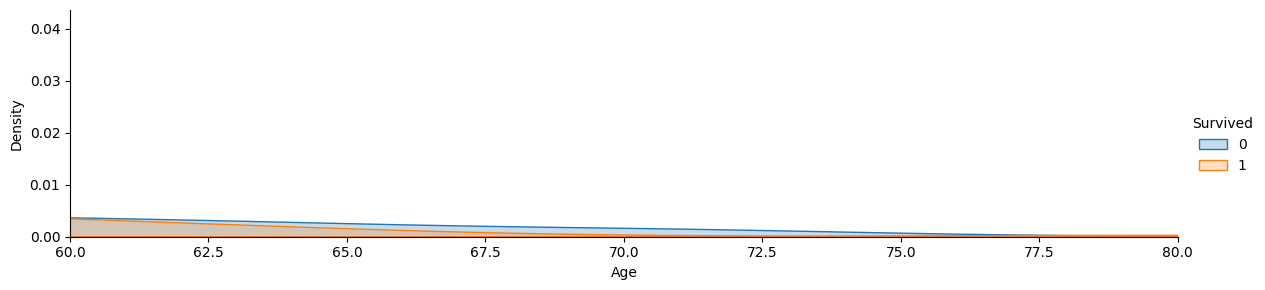

In [124]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

Manera de actividad pROFE

In [125]:
# The previous attempt to loop through 'df' was incorrect.
# We need to apply the logic directly to the DataFrame's 'Age' column.

# Define the age grouping logic
def classify_age_group(age):
    if age <= 12:
        return 0 # Niño
    elif 13 <= age <= 19:
        return 1 # Adolescente
    elif 20 <= age <= 35:
        return 2 # Joven adulto
    elif 36 <= age <= 60:
        return 3 # Adulto
    else:
        return 4 # Adulto mayor

# Apply the age grouping logic to create a new 'Age' column with numerical categories
df['Age'] = df['Age'].apply(classify_age_group)

# Display the updated DataFrame (optional)
display(df.head())

# You can now use this new 'Age' column for further analysis or visualization
# For example, you can check the value counts of the new 'Age' categories:
# print(df['Age'].value_counts())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Group
0,1,0,3,male,2,1,0,7.2500,S,señor,Joven adulto
1,2,1,1,female,3,1,0,71.2833,C,señorita,Adulto
2,3,1,3,female,2,0,0,7.9250,S,señora,Joven adulto
3,4,1,1,female,2,1,0,53.1000,S,señorita,Adulto
4,5,0,3,male,2,0,0,8.0500,S,señor,Adulto


# **Arbol de decision Titanic**

In [130]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"

In [129]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-611096867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [131]:
X = df[features]
y = df[target]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [137]:
modelo = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [138]:
train_score = modelo.score(X_train, y_train)
test_score = modelo.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_score:.3f}")
print(f"Precisión en prueba: {test_score:.3f}")

Precisión en entrenamiento: 0.837
Precisión en prueba: 0.810


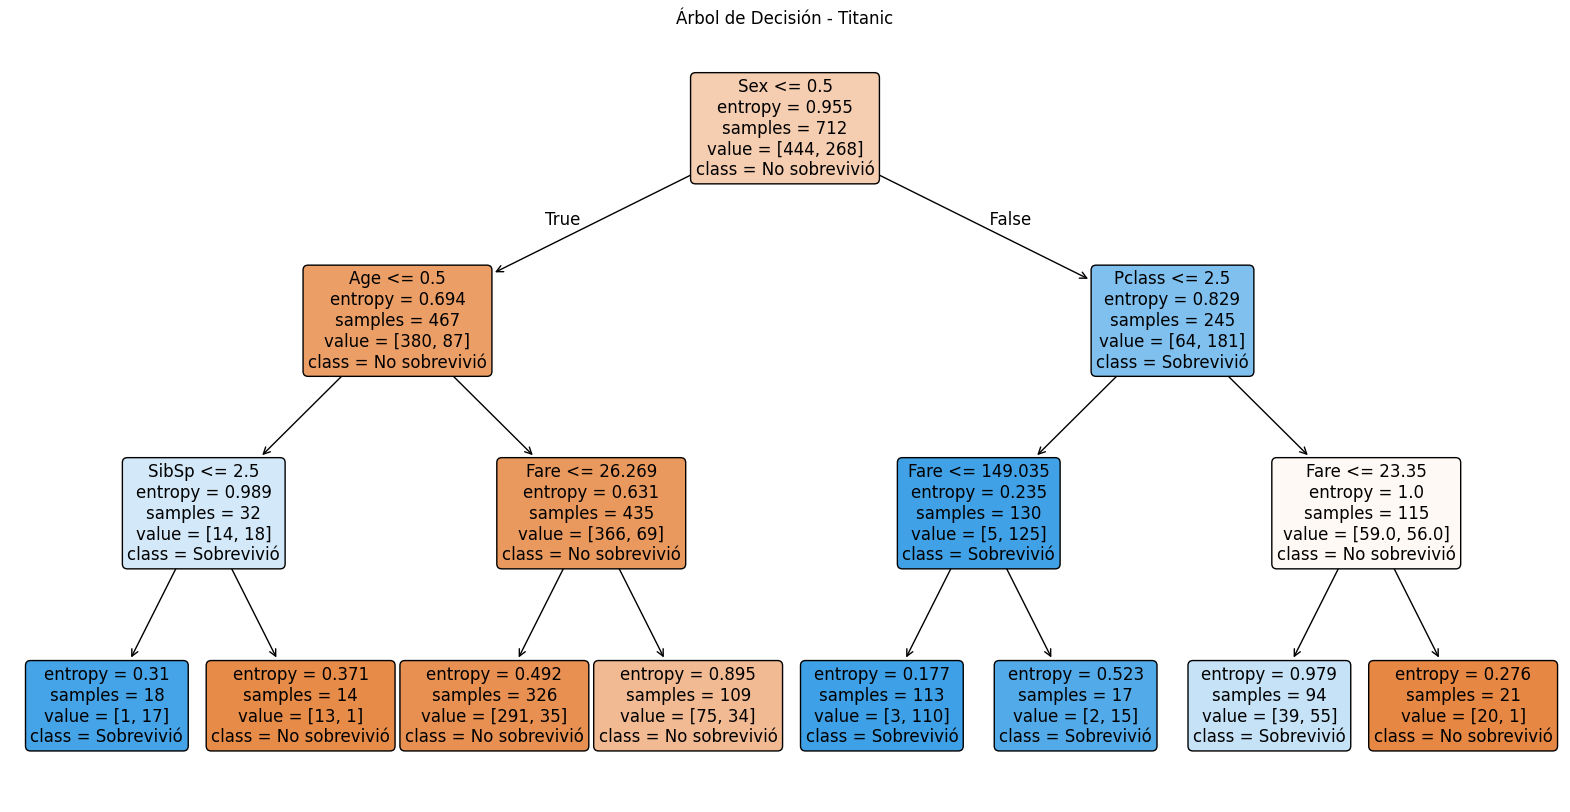

In [139]:
plt.figure(figsize=(20,10))
plot_tree(
    modelo,
    feature_names=features,
    class_names=["No sobrevivió", "Sobrevivió"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Árbol de Decisión - Titanic")
plt.show()

IMPORTANCIA E PREDICTOR

In [141]:
importancias_titanic = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("🔎 Importancia de las variables - Titanic")
display(importancias_titanic)


🔎 Importancia de las variables - Titanic


,Variable,Importancia
1,Sex,0.538294
0,Pclass,0.201791
5,Fare,0.124122
3,SibSp,0.073257
2,Age,0.062535
4,Parch,0.000000


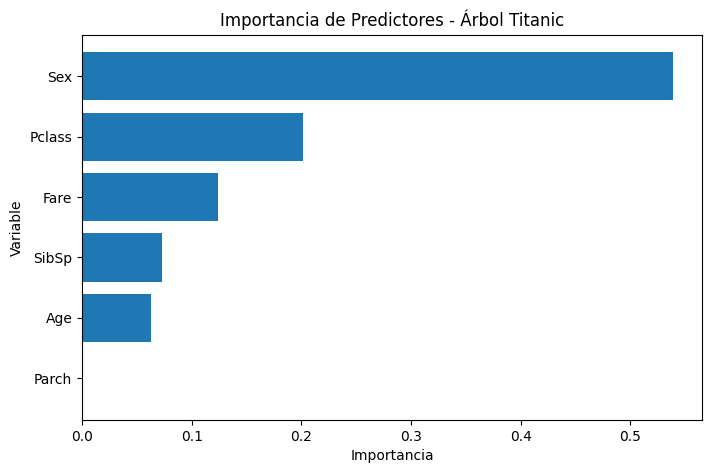

In [142]:


plt.figure(figsize=(8,5))
plt.barh(importancias_titanic['Variable'], importancias_titanic['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Predictores - Árbol Titanic')
plt.gca().invert_yaxis()
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [145]:
y_pred = modelo.predict(X_test)

In [147]:
cm = confusion_matrix(y_test, y_pred)
print(" Matriz de Confusión:")
print(cm)
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


 Matriz de Confusión:
[[92 13]
 [21 53]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [151]:
y_prob = modelo.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
gini = 2 * auc - 1

print(f"\n Índice Gini : {gini:.3f}")


 Índice Gini : 0.720


In [152]:
rmse_titanic = np.sqrt(mean_squared_error(y_test, y_prob))
print(f"\n RMSE (Titanic): {rmse_titanic:.2f}")



📉 RMSE (Titanic): 0.37
